# SPDA SUMMATIVE ASSESSMENT QUESTION 2


Name: Olayemi Amusile

UOB ID: jh24993

## Webscrapping Using Reddit API


#### Where does the data come from?

The data was gotten through the Reddit website, under the subreddit health (r\health) - The data consists of all the health topic being discussed on the forum from 10/18/2024 - 11/27/2024.

#### Aim of study

The aim of this analysis is to identify the key topics and drivers of engagement in the subreddit(health) on the reddit platform.

In this analysis we will explore:
1. The most dicussed health topics.
2. Understand what influnences high engagement.
3. Analyse the contribution patterns of authors.
4. Determine the impact of sentiment analysis.
5. Hypothesis test/prediction if scores affects number of comments on a post.

#### What are the variables of interest?

The variables of interst include: 

1. Title: The headline of the Reddit post that explains what the post is about.
2. Author: The Reddit username of the person who wrote the post.
3. Date: The day the topic was submitted on the forum.
4. Score: The total upvotes minus downvotes the post has received, showing how well the post was liked by the community.
5. Number of Comments (num_comments): The total number of comments made on the post, showing how much discussion it generated.


#### How was the data scrapped/collected?

To scrape data from the Reddit API, I first opened a reddit account, then I registered for API credentials via Reddit's developer portal. I got my client_id, client_secret and user_agent after the registration.

Praw was installed using "pip install praw" to enable scrapping from the Reddit website. Praw is a Python wrapper for the Reddit API, which makes authentication and JSON parsing easy.

Then I authenticated using client_id, client_secret, and user_agent.

After that, I used reddit.subreddit('health') to fetch the health post data. 


In [1]:
import praw

#Authentication
reddit = praw.Reddit(
    client_id="5Wv14SUqGs8ETZ8inzjcMg",
    client_secret="0zUUYuMLM2vBe2-XVIExAqochF5gQQ",
    user_agent="windows:my_app:1.0 (by /u/Life_Hat1137)",
    username="Life_Hat1137",  
    password="Ola07061193131" 
)

print("Authenticated as:", reddit.user.me())

Authenticated as: Life_Hat1137


#### Step 2 - Perform data preparation/cleaning

In [3]:
import praw
import pandas as pd
import arrow

#Submission - this calls the columns(metadata) of interest
health_submissions = []

#Submissions list from r/health
for submission in reddit.subreddit('health').hot(limit=500):
    h = {}
    h['id'] = submission.id
    h['title'] = submission.title
    h['num_comments'] = submission.num_comments
    h['score'] = submission.score
    h['upvote_ratio'] = submission.upvote_ratio
    h['domain'] = submission.domain
    h['num_crossposts'] = submission.num_crossposts
    h['nsfw'] = submission.over_18
    h['author'] = submission.author.name if submission.author else None
    h['subreddit'] = submission.subreddit.display_name
    
    # Convert created_utc to clear date WITH arrow
    h['date'] = arrow.get(submission.created_utc).format('YYYY-MM-DD')
    
    health_submissions.append(h)

##### Load the data set into a dataframe using pandas and save data set as a CSV file

In [4]:
df = pd.DataFrame(health_submissions)

print(df.head())

df.to_csv('health_reddit_data_with_dates_arrow.csv', index=False)

        id                                              title  num_comments  \
0  1h13uv0  Billions of people suffer from anemia, but the...             2   
1  1h0uuxq  Wildfire Smoke Linked to Increased Risk of Dem...             6   
2  1h0v6h7  Reducing Abdominal Fat: Researchers Uncover Su...            28   
3  1h0gfjj           Everyone Agrees Americans Aren’t Healthy            91   
4  1h0oint  Vaping immediately affects vascular health and...            15   

   score  upvote_ratio                  domain  num_crossposts   nsfw  \
0     24          1.00      ourworldindata.org               1  False   
1     92          0.97  scientificamerican.com               0  False   
2     76          0.72        scitechdaily.com               0  False   
3    477          0.98         theatlantic.com               0  False   
4     75          0.90                 cnn.com               0  False   

            author subreddit        date  
0   F0urLeafCl0ver    Health  2024-11-27  


##### Display the number of rows and columns from the data set

In [7]:
rows, columns = df.shape

print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")

Number of rows: 397
Number of columns: 11


##### Loading the dataset

In [196]:
health_reddit = pd.read_csv('health_reddit_data_with_dates_arrow.csv')

##### Inspect the data

In [11]:
health_reddit

,id,title,num_comments,score,upvote_ratio,domain,num_crossposts,nsfw,author,subreddit,date
0,1h13uv0,"Billions of people suffer from anemia, but the...",2,24,1.00,ourworldindata.org,1,False,F0urLeafCl0ver,Health,2024-11-27
1,1h0uuxq,Wildfire Smoke Linked to Increased Risk of Dem...,6,92,0.97,scientificamerican.com,0,False,Splenda,Health,2024-11-27
2,1h0v6h7,Reducing Abdominal Fat: Researchers Uncover Su...,28,76,0.72,scitechdaily.com,0,False,cuspofgreatness,Health,2024-11-27
3,1h0gfjj,Everyone Agrees Americans Aren’t Healthy,91,477,0.98,theatlantic.com,0,False,theatlantic,Health,2024-11-26
4,1h0oint,Vaping immediately affects vascular health and...,15,75,0.90,cnn.com,0,False,cnn,Health,2024-11-26
...,...,...,...,...,...,...,...,...,...,...,...
392,1g6v9sj,Routine dental X-rays are not backed by eviden...,64,534,0.96,arstechnica.com,0,False,F0urLeafCl0ver,Health,2024-10-18
393,1g6q5pr,Companies Knew the Dangers of PFAS 'Forever Ch...,34,794,0.99,time.com,0,False,Hazzman,Health,2024-10-18
394,1g6qzdn,Drug overdose deaths fall for 6 months straigh...,67,425,0.98,nbcnews.com,0,False,nbcnews,Health,2024-10-18
395,1g6tw1t,How does the brain react to birth control? A r...,15,174,0.98,nature.com,0,False,maxkozlov,Health,2024-10-18


In [13]:
health_reddit.columns

Index(['id', 'title', 'num_comments', 'score', 'upvote_ratio', 'domain',
       'num_crossposts', 'nsfw', 'author', 'subreddit', 'date'],
      dtype='object')

In [15]:
health_reddit.describe(include= 'all')

,id,title,num_comments,score,upvote_ratio,domain,num_crossposts,nsfw,author,subreddit,date
count,397,397,397.000000,397.000000,397.000000,397,397.000000,397,396,397,397
unique,397,394,NaN,NaN,NaN,108,NaN,2,109,1,41
top,1h13uv0,Inside the Company Helping America’s Biggest H...,NaN,NaN,NaN,nbcnews.com,NaN,False,nbcnews,Health,2024-11-20
freq,1,2,NaN,NaN,NaN,30,NaN,396,25,397,21
mean,NaN,NaN,27.423174,176.360202,0.911587,NaN,0.130982,NaN,NaN,NaN,NaN
std,NaN,NaN,50.713966,246.254762,0.103405,NaN,0.393087,NaN,NaN,NaN,NaN
min,NaN,NaN,0.000000,0.000000,0.290000,NaN,0.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,2.000000,27.000000,0.890000,NaN,0.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,7.000000,81.000000,0.950000,NaN,0.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,29.000000,225.000000,0.970000,NaN,0.000000,NaN,NaN,NaN,NaN


In [17]:
health_reddit.author.value_counts()

author
nbcnews                 25
nytopinion              22
euronews-english        17
CTVNEWS                 17
newzee1                 16
                        ..
UncoveringScandals90     1
tasty_jams_5280          1
poltrudes                1
nesp12                   1
maxkozlov                1
Name: count, Length: 109, dtype: int64

### Step 2: Perform Data Preparation And Cleaning

#### Steps to prepare, clean your data, or extract new features

The following steps were taken to prepare and clean the data.
1. Identifying any missing data, fortunately.
2. Remove unwanted columns.
3. Checking for outliers.
6. The clean data was saved as a new csv file.

#### Missing data

The data showed one missing missing values.

In [176]:
#Missing values
print(df.isnull().sum()) 

id                0
num_comments      0
score             0
clean_author      1
date              0
clean_title       0
num_posts         1
author_numeric    0
dtype: int64


Remove missing value

In [191]:
health_reddit = health_reddit.dropna()

The code below will remove unwanted columns

In [198]:
# Remove unwanted columns
columns_to_drop = ['nsfw', 'num_crossposts', 'domain', 'upvote_ratio']
health_reddit.drop(columns=columns_to_drop, inplace=True)
print(health_reddit.columns)

Index(['id', 'title', 'num_comments', 'score', 'author', 'subreddit', 'date'], dtype='object')


#### Checking for outliers

The scatter plot highlight that posts with lower scores tend to have fewer comments, as most data points gather at the lower ranges of both axes. A few posts with higher scores and moderate comments show positive correlation, though it appears weak. 

Outliers exist with scores above 1000 or comments near 900, representing topic that are popular or controversial. The data's concentration near the origin suggests most posts receive minimal engagement. 

Higher scores may correlate with more comments.

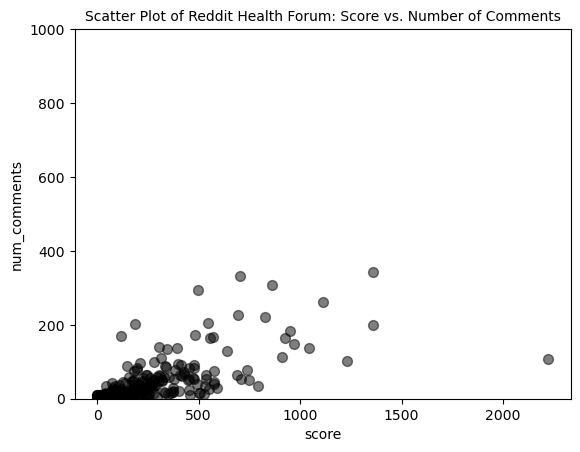

In [30]:
import matplotlib.pyplot as plt

# Create the scatter plot
ax = health_reddit.plot.scatter(x='score', y='num_comments', s=50, c='k', alpha=0.5)

ax.set_ylim(0, 1000)  # Limit y-axis from 0 to 1,000
ax.set_title('Scatter Plot of Reddit Health Forum: Score vs. Number of Comments', fontsize=10)
plt.show()

Changing uppercase words to lowercase in the dataset this is important to improve the consistency of the dataset and reduce duplicates.

In [203]:
# Convert all words in the 'clean_title' column to lowercase
health_reddit['clean_title'] = health_reddit['title'].str.lower()

# Convert the 'author' column to lowercase
health_reddit['clean_author'] = health_reddit['author'].str.lower()
print(health_reddit[['clean_title', 'clean_author']].head())

                                         clean_title     clean_author
0  billions of people suffer from anemia, but the...   f0urleafcl0ver
1  wildfire smoke linked to increased risk of dem...          splenda
2  reducing abdominal fat: researchers uncover su...  cuspofgreatness
3           everyone agrees americans aren’t healthy      theatlantic
4  vaping immediately affects vascular health and...              cnn


#### More data cleaning

I used re, nltk libraries to clean text data by removing special characters, stopwords, tokenizing, and lemmatizing words for analysis.

In [205]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize stop words and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    if not isinstance(text, str):  # Check if the input is a string
        return ''
    # Convert text to lowercase
    text = text.lower()
    # Remove URLs and special characters
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    text = re.sub(r'[^a-z\s]', '', text)
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stop words and apply lemmatization
    cleaned_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    # Join tokens into a string
    return ' '.join(cleaned_tokens)

# Verify columns exist before applying cleaning
if 'clean_title' in health_reddit.columns and 'clean_author' in health_reddit.columns:
    health_reddit['clean_title'] = health_reddit['clean_title'].apply(clean_text)
    health_reddit['clean_author'] = health_reddit['clean_author'].apply(clean_text)

# View the cleaned columns
print(health_reddit[['clean_title', 'clean_author']].head())

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                                         clean_title     clean_author
0      billion people suffer anemia cheap way reduce     furleafclver
1      wildfire smoke linked increased risk dementia          splenda
2  reducing abdominal fat researcher uncover surp...  cuspofgreatness
3             everyone agrees american arent healthy      theatlantic
4  vaping immediately affect vascular health oxyg...              cnn


In [81]:
cleaned_data_new = health_reddit[['id', 'num_comments','score','clean_author','date', 'clean_title']].copy()

In [83]:
cleaned_data_new.to_csv('cleaned_health_reddit_data_new.csv', index=False)

In [85]:
clean_data = pd.read_csv('cleaned_health_reddit_data_new.csv')

In [207]:
clean_data

,id,num_comments,score,clean_author,date,clean_title,topic,sentiment
0,1h13uv0,2,24,furleafclver,2024-11-27,billion people suffer anemia cheap way reduce,2,0.40
1,1h0uuxq,6,92,splenda,2024-11-27,wildfire smoke linked increased risk dementia,3,0.00
2,1h0v6h7,28,76,cuspofgreatness,2024-11-27,reducing abdominal fat researcher uncover surp...,3,0.70
3,1h0gfjj,91,477,theatlantic,2024-11-26,everyone agrees american arent healthy,2,0.25
4,1h0oint,15,75,cnn,2024-11-26,vaping immediately affect vascular health oxyg...,4,0.00
...,...,...,...,...,...,...,...,...
392,1g6v9sj,64,534,furleafclver,2024-10-18,routine dental xrays backed evidenceexperts wa...,0,0.00
393,1g6q5pr,34,794,hazzman,2024-10-18,company knew danger pfas forever chemicalsand ...,0,-0.40
394,1g6qzdn,67,425,nbcnews,2024-10-18,drug overdose death fall month straight offici...,0,0.20
395,1g6tw1t,15,174,maxkozlov,2024-10-18,brain react birth control researcher scanned t...,1,0.00


### Step 3 - Exploratory Data analysis


##### Calculate the sum of num_comments and score.

In [209]:
total_sum = clean_data['num_comments'].sum()
print("Sum of num_comments:", total_sum)

total_counts = clean_data['score'].sum()
print("Sum of score:", total_counts)

Sum of num_comments: 10887
Sum of score: 70015


This result shows that:
1. The total comments made on the subreddit health post between 10/18/2024 - 11/27/2024 is 10887.
2. The total upvotes on the subreddit health forum between 10/18/2024 - 11/22/2024 is 70015

##### Calculate the means of num_comments, score.

In [211]:
mean_comments = clean_data['num_comments'].mean()
print("Mean num_comments:", mean_comments)

mean_score = clean_data['score'].mean()
print("Mean score:", mean_score)

Mean num_comments: 27.42317380352645
Mean score: 176.36020151133502


This result shows that:
1. The average number of comments per post is 27.42317380352645
2. The average engagement per post is176.360201511335025

##### Calculate the range of num_comments, score.

In [49]:
range_comments = clean_data['num_comments'].max() - clean_data['num_comments'].min()
print("Range num_comments is", range_comments)

range_score = clean_data['score'].max() - clean_data['score'].min()
print("Range score:", range_score)

Range num_comments is 343
Range score: 2223


This shows that:
1. The range of comments shows the difference in engagemets, not all post had same number of engagements, some where more engaging than others.
2. The range of score shows a differnce in the popularity of the various discussion topics

##### Calculate the standard deviation of the num_commnents and the score.

In [52]:
standard_deviation_comments = clean_data["num_comments"].std()
print("Standard_deviation_comments:", standard_deviation_comments)

standard_deviation_score = clean_data["score"].std()
print("standard_deviation_score:",standard_deviation_score)

Standard_deviation_comments: 50.713965830977685
standard_deviation_score: 246.25476199663626


This shows that: 
1. The stanadard deviation of comments shows that most posts have a similar number of comments.
2. The standard deviation of score shows that most post have scores close to average

#### Histograms

From the histograms below:

1. The post scores and number of comments highlights that certain posts gain much higher engagement compared to others.
2. Some posts went viral while most others did not.

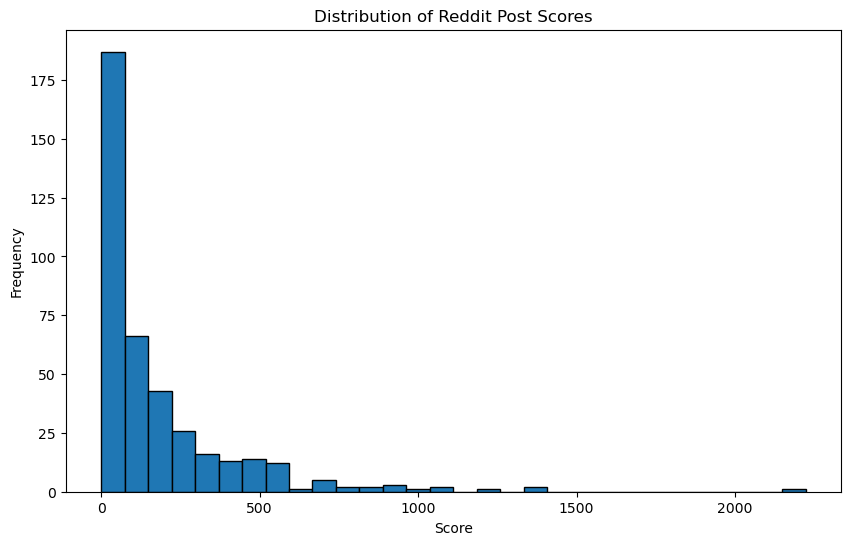

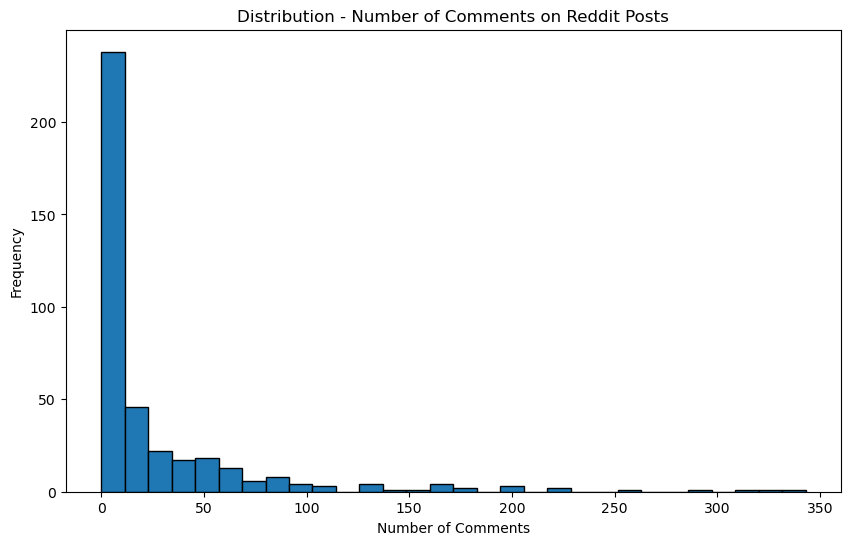

In [54]:
# Plot a histogram for the 'score' column
plt.figure(figsize=(10, 6))
plt.hist(clean_data['score'], bins=30, edgecolor='black')
plt.title('Distribution of Reddit Post Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

# Plot a histogram for the 'num_comments' column
plt.figure(figsize=(10, 6))
plt.hist(clean_data['num_comments'], bins=30, edgecolor='black')
plt.title('Distribution - Number of Comments on Reddit Posts')
plt.xlabel('Number of Comments')
plt.ylabel('Frequency')
plt.show()

In the histogram below we looked at the distribution of score across posts that contain key words - 'vaccine', 'cancer', 'outbreak', 'mental health', 'abortion

From the histogram we see that there is an unequal score across the individual posts with the unique key words. This highlights that some topics got more enegagements that others.

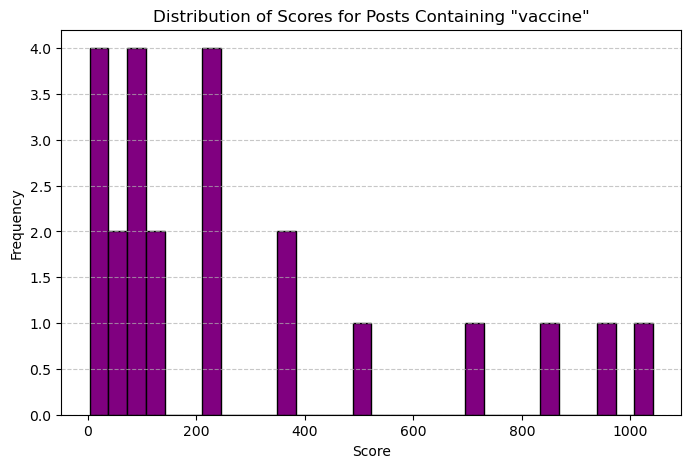

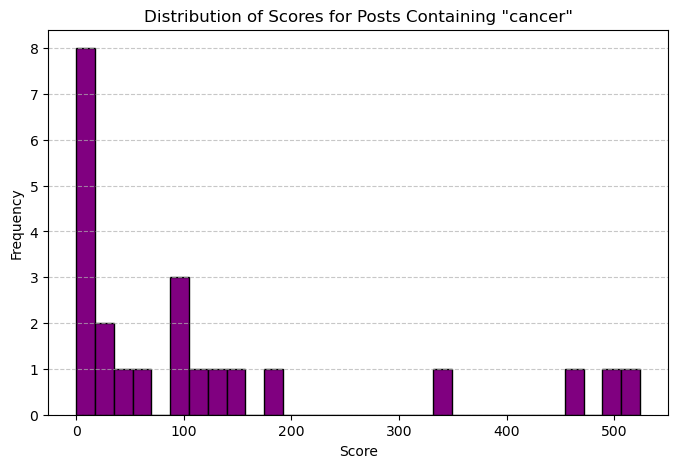

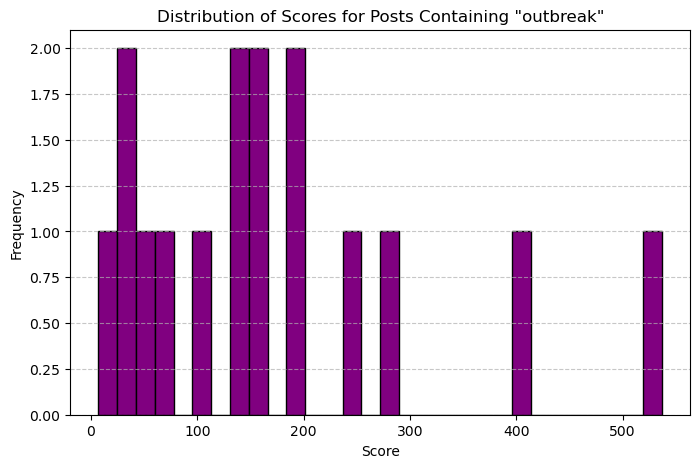

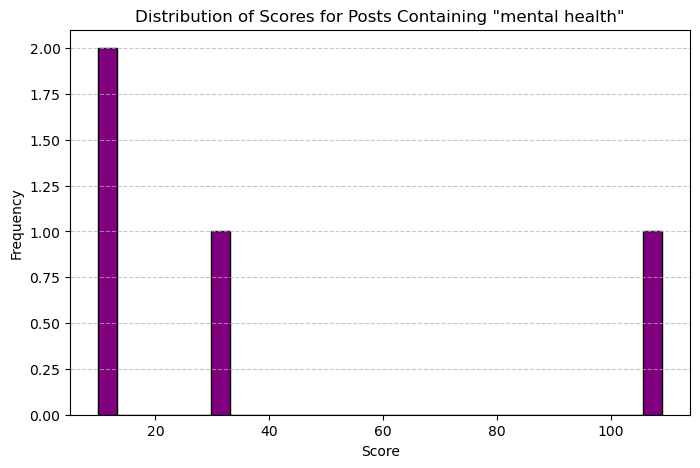

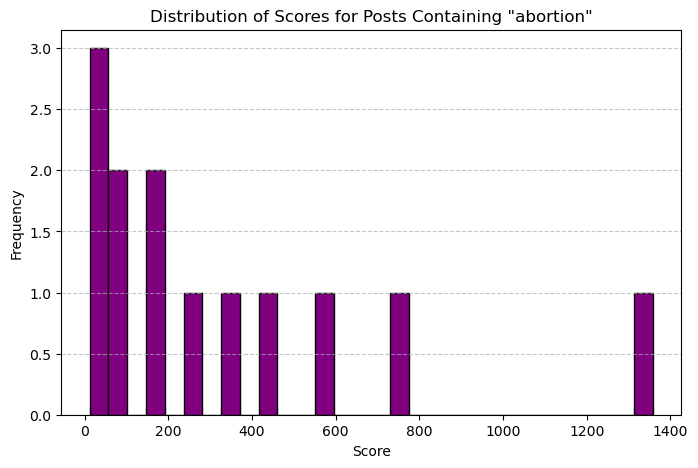

In [60]:
keywords = ['vaccine', 'cancer', 'outbreak', 'mental health', 'abortion']

for keyword in keywords:
    keyword_data =clean_data[clean_data['clean_title'].str.contains(keyword, case=False, na=False)]
    
    plt.figure(figsize=(8, 5))
    plt.hist(keyword_data['score'], bins=30, color='purple', edgecolor='black')
    plt.title(f'Distribution of Scores for Posts Containing "{keyword}"')
    plt.xlabel('Score')
    plt.ylabel('Frequency')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

The histogram below shows a Logarithmic Histogram for Score and Number of Comments.
The result shows us a clearer view of the patterns of engagement across topic and highlights the fact that some post are more engaging than others even when we compare with either score or number of comments.

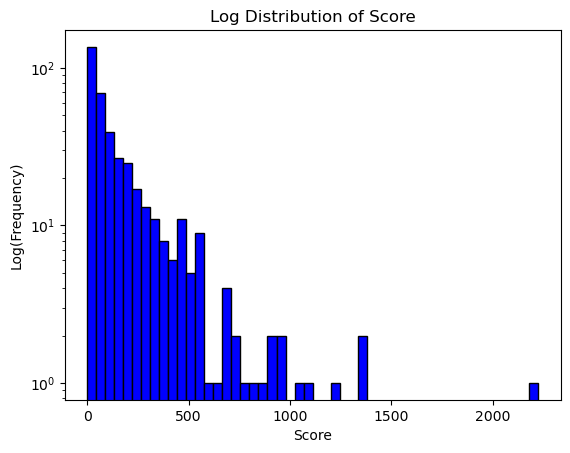

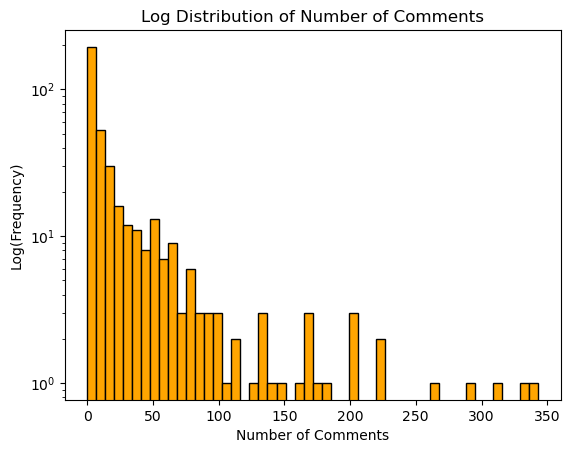

In [62]:
#Plot histogram for the log distribution of score
plt.hist(clean_data['score'], bins=50, color='blue', edgecolor='black', log=True)
plt.title('Log Distribution of Score')
plt.xlabel('Score')
plt.ylabel('Log(Frequency)')
plt.show()

#Plot histogram for the log distribution of number of comments
plt.hist(clean_data['num_comments'], bins=50, color='orange', edgecolor='black', log=True)
plt.title('Log Distribution of Number of Comments')
plt.xlabel('Number of Comments')
plt.ylabel('Log(Frequency)')
plt.show()

#### Scatter plots

From the scattered plot below:

1. The regression line shows a positive correlation between scores and number of comments.

2. Posts with higher scores tend to have more comments but the relationship is not perfect.

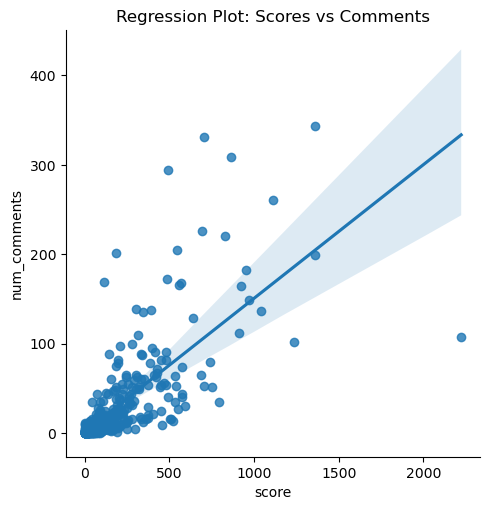

In [64]:
import seaborn as sns
sns.lmplot(x='score', y='num_comments', data=clean_data, scatter_kws={'alpha': 0.8})
plt.title('Regression Plot: Scores vs Comments')
plt.show()

The scattered plot below shows that some authors have more engagememts than others. Most authors have posts at lower scores under 500.
Few authors have very high-scoring posts with points above 2000.

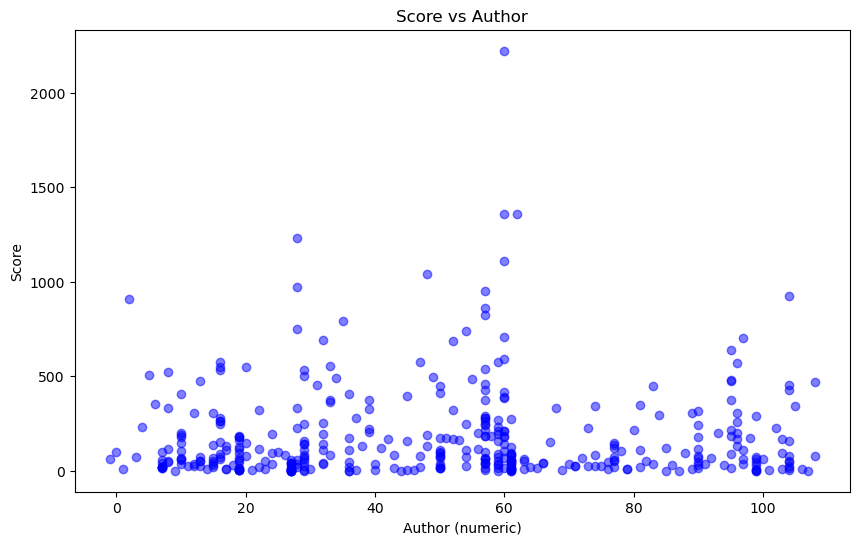

In [91]:
#Calculate the number of posts per author
author_post_count = clean_data['clean_author'].value_counts().reset_index()
author_post_count.columns = ['clean_author', 'num_posts']
 
df = clean_data.merge(author_post_count, on='clean_author', how='left')

# Convert 'author' to numeric data
df['author_numeric'] = clean_data['clean_author'].astype('category').cat.codes

plt.figure(figsize=(10, 6))
plt.scatter(df['author_numeric'], df['score'], color='blue', alpha=0.5)
plt.title('Score vs Author')
plt.xlabel('Author (numeric)')
plt.ylabel('Score')
plt.show()


##### Here, we try to check the highest occuring words in the topics found in our data set.
The top 10 highest occuring words are:
1. Health
2. Study
3. New
4. Say
5. jr
6. rfk
7. Drug
8. Flu
9. bird
10. trump

In [95]:
from collections import Counter

all_words = ' '.join(clean_data['clean_title']).split()
word_freq = Counter(all_words)
print(word_freq.most_common(10))

[('health', 56), ('jr', 34), ('study', 31), ('say', 30), ('rfk', 29), ('new', 29), ('flu', 27), ('trump', 25), ('drug', 24), ('bird', 23)]


#### Wordcloud

The wordcloud below highlights the most frequently used words in the topics discussed in the data set.

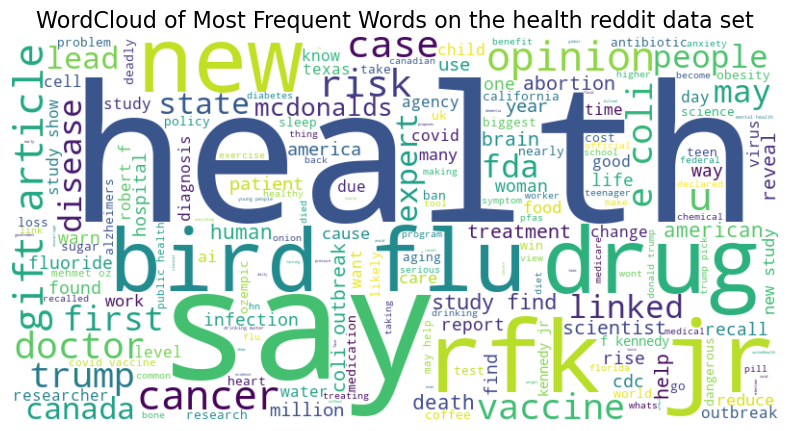

In [102]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_words))

# Create the plot
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud of Most Frequent Words on the health reddit data set', fontsize=16)
plt.show()

#### Bar charts

The bar chart below shows the top authors with the highest number of posts between 10/2/2024 - 11/15/2024 

Nbcnews had the highest number of posts,followed by nytopinion, euronewswnglish, ctvnews, newzee, furleafclver maxcactus, newsweek, cnn and cbsnews

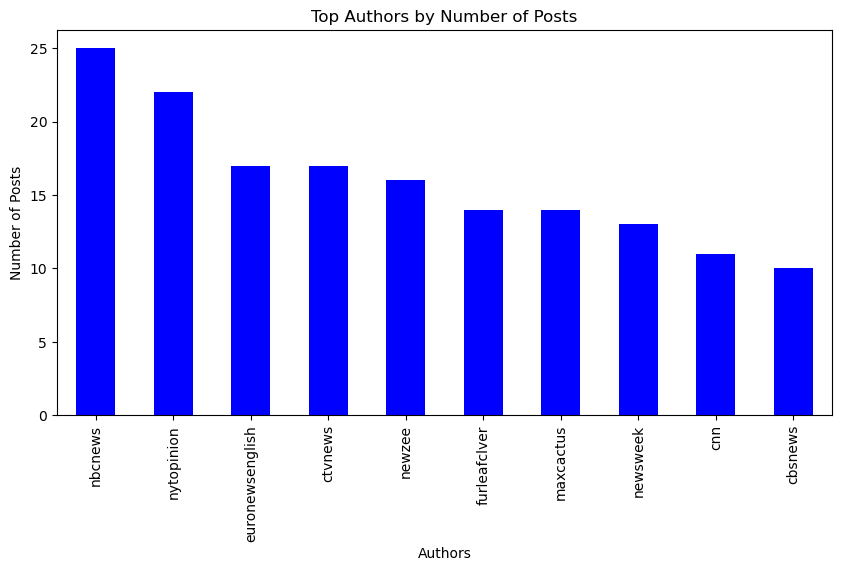

In [108]:
top_authors = clean_data['clean_author'].value_counts().head(10)  # Top 10 authors
top_authors.plot(kind='bar', figsize=(10, 5), title='Top Authors by Number of Posts', color='blue')
plt.xlabel('Authors')
plt.ylabel('Number of Posts')
plt.show()

The bar chart below shows the top 10 authors with the highest performing titles(topics) - From the bar chat, we can tell that the newzee has the highest performing title and from the previous bar chart newzee was the 7th highest posting author. This means, authors that post frequently may have a chance to having high engagements. High performing post may also be linked to the relevance of the topic of discussion. 

Nbcbews and wiredmagazine that features as part of the top authors with the highest number of post also had 5th and 6th top performing titles. This shows a possiblility that constant posting can impact user enagagement with titles(topics).

Other authors with high perfoming titles(topics) are poltrudes, Exastiken, marji80, nbcnews, wired magazine, asdtyyhfh, hazzman, miolmok, Hazzman, ajn160.

Some of the top performing titles(topics) were authored by individuals.

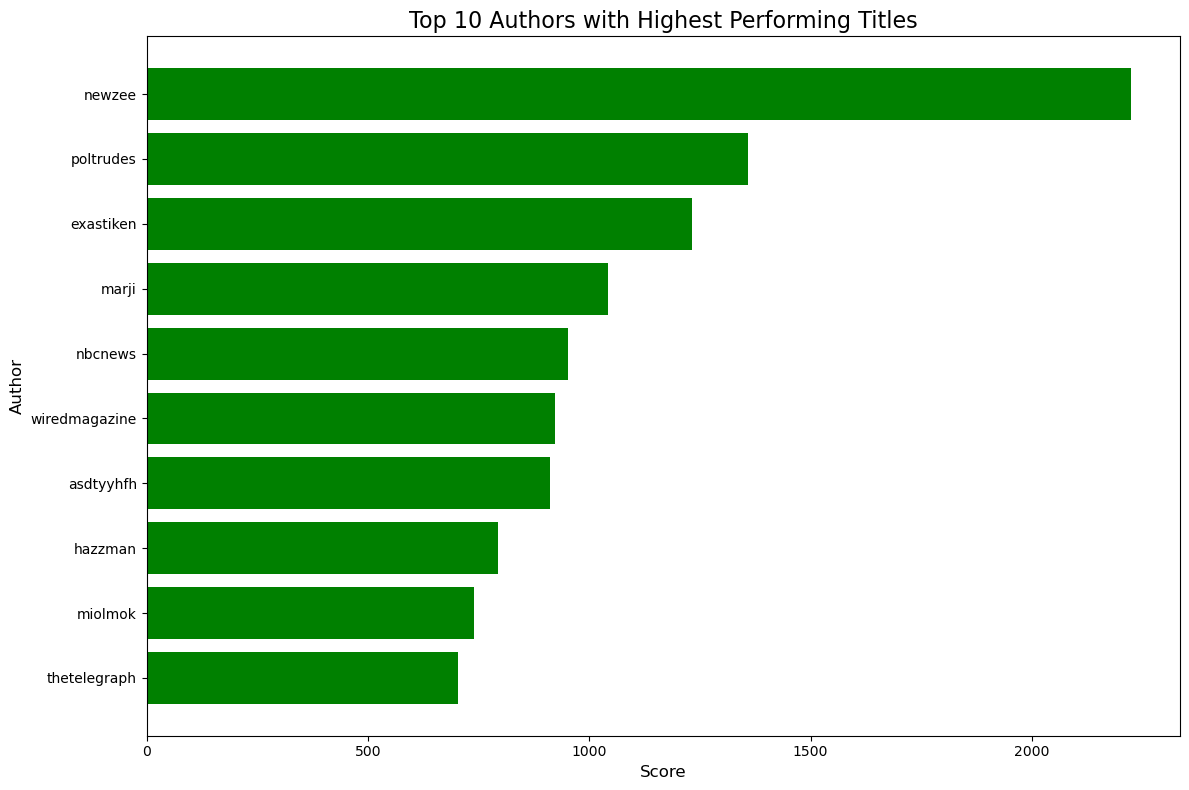

In [114]:
# Find the highest-performing title for the authors
top_titles = clean_data.loc[clean_data.groupby('clean_author')['score'].idxmax()]
top_10_authors = top_titles.sort_values(by='score', ascending=False).head(10)

# Bar chart
plt.figure(figsize=(12, 8))
plt.barh(top_10_authors['clean_author'], top_10_authors['score'], color='green')
plt.xlabel('Score', fontsize=12)
plt.ylabel('Author', fontsize=12)
plt.title('Top 10 Authors with Highest Performing Titles', fontsize=16)
plt.gca().invert_yaxis()  # Invert y-axis for readability
plt.tight_layout()
plt.show()

The bar chart below shows the top performing title(topics) based on their score(upvotes).

From the chart, we can see that the highest performing title is "Vasectomies rise 1,299 After Donald Trump Election Win".

The possibility of this post being the highest performing may be linked to the fact that the authors posts often and the discussion is a controversial one inspired by a recently concluded political election.

Please note: I used health_reddit here because the clean_data has undergone some word processing and altered the full topic sentences.

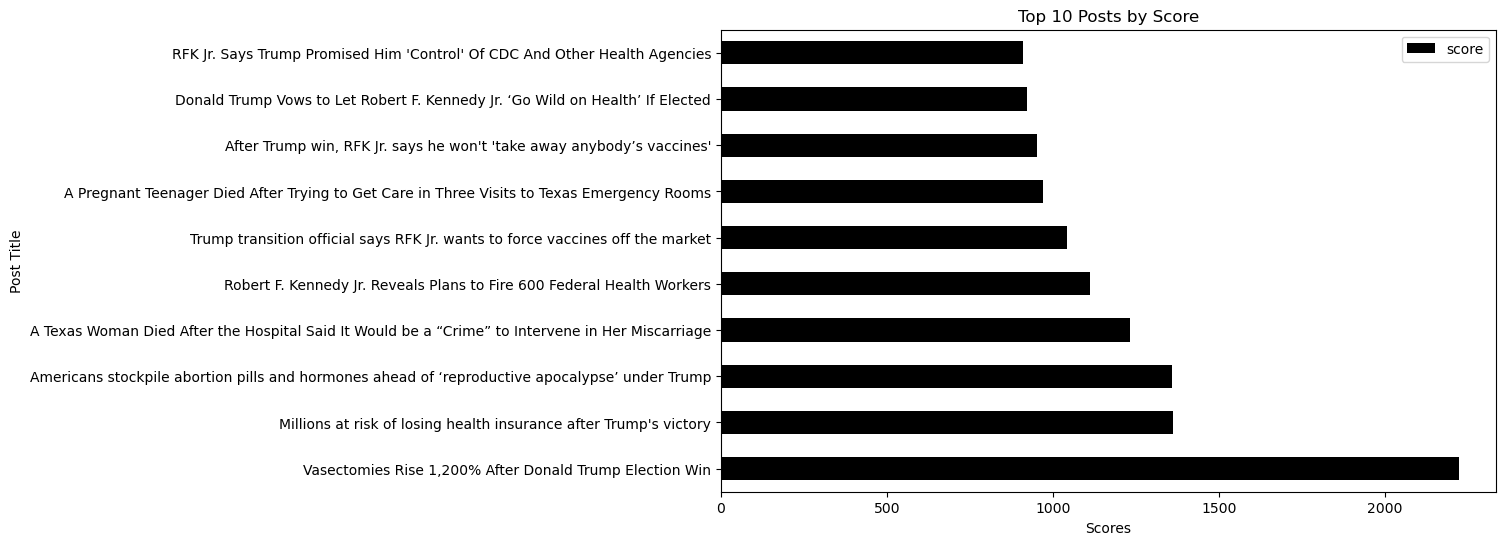

In [116]:
top_posts = health_reddit.nlargest(10, 'score')
top_posts.plot(x='title', y='score', kind='barh', figsize=(10, 6), title='Top 10 Posts by Score', color='black')
plt.xlabel('Scores')
plt.ylabel('Post Title')
plt.show()

The bar chart below shows the top 10 performing titles(topics) based on the number of comments.

The highest performing title here is "Millions at risk of losing health insurance after Trump's victory" which is different from the highest performing post by score. The highest performing post by number of comments is the second performing post by score. This shows a relationship between number of comments and score.

However, not all posts with high comments have high score(upv0tes).

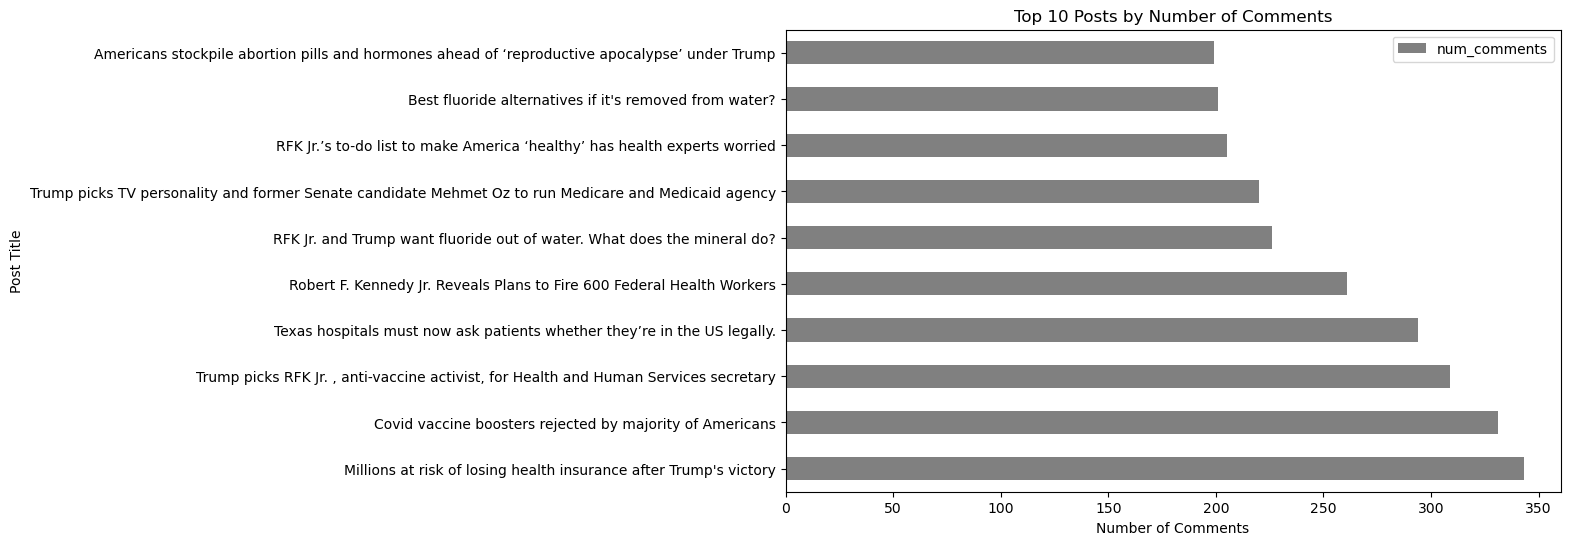

In [118]:
top_comments = health_reddit.nlargest(10, 'num_comments')
top_comments.plot(x='title', y='num_comments', kind='barh', figsize=(10, 6), title='Top 10 Posts by Number of Comments', color='gray')
plt.xlabel('Number of Comments')
plt.ylabel('Post Title')
plt.show()

The barchart below shows the top frequently used words in titles.

The top words includes - health, new, study, cancer, flu, jr, bird, says, article, trump.

Some of the words are not medical term but they appeared most in the health titles(topics)

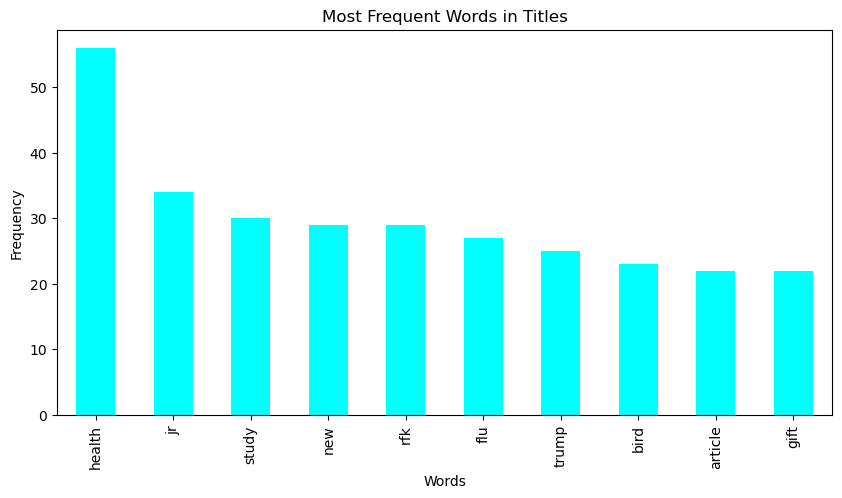

In [120]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words='english', max_features=10)
word_counts = vectorizer.fit_transform(health_reddit['title'])
words = vectorizer.get_feature_names_out()
counts = word_counts.toarray().sum(axis=0)

pd.Series(counts, index=words).sort_values(ascending=False).plot(kind='bar', figsize=(10, 5), title='Most Frequent Words in Titles', color='cyan')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

From the trend chart below:

1. 'Vaccine' topics did not gather so much conversations.
2. Topics on 'cancer' peaked btw the 8/11/2024 to 15/11/2024
3. Topics related to 'bird flu' also gained attention on the 01/11/2024 and 22/11/2024
4. Other topics like study and treatment did gather so much engagements.

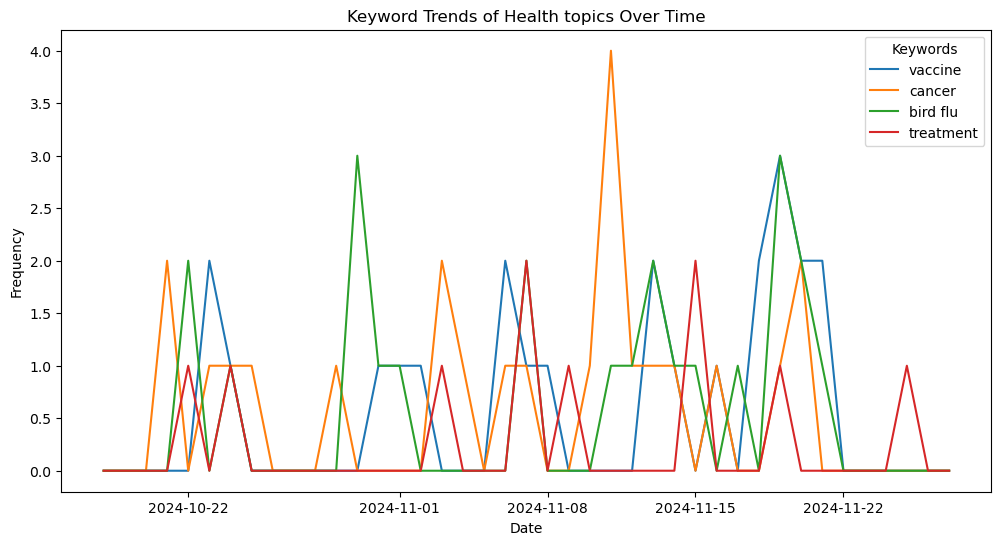

In [126]:
# Convert 'date' column to datetime
clean_data['date'] = pd.to_datetime(clean_data['date'], errors='coerce')

keywords = ['vaccine', 'cancer', 'bird flu', 'treatment']

keyword_trends = pd.DataFrame()

for keyword in keywords:
    keyword_trends[keyword] = clean_data['clean_title'].str.contains(keyword, case=False, na=False).groupby(clean_data['date'].dt.date).sum()

keyword_trends.plot(figsize=(12, 6), title='Keyword Trends of Health topics Over Time')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.legend(title='Keywords')
plt.show()

The pie chart below shows the top 10 most active authors based on their number of posts.

Nbcnews showed the highest number of posts with 15.7% while cbsnews and cnn had 6.3% and 6.9% respectively

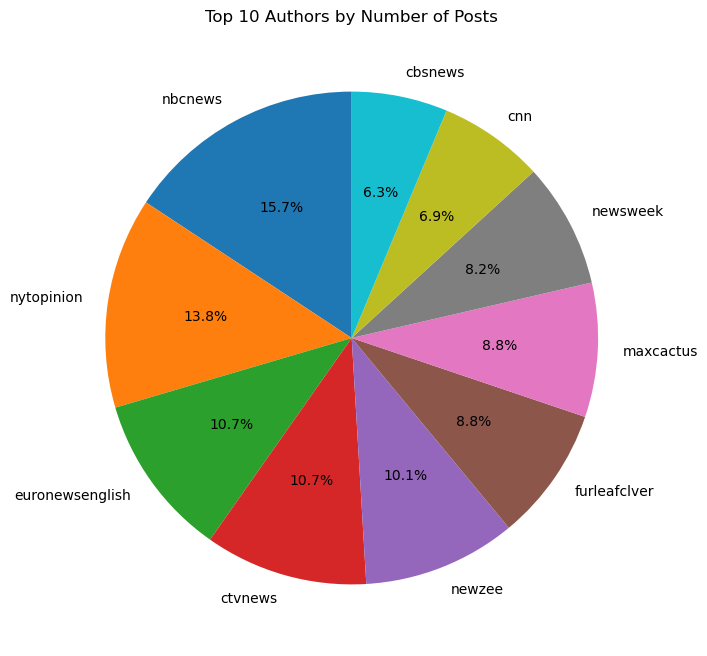

In [131]:
author_counts = clean_data['clean_author'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(author_counts.head(10), labels=author_counts.head(10).index, autopct='%1.1f%%', startangle=90)
plt.title('Top 10 Authors by Number of Posts')
plt.show()

### Step 4: Ask question about your data


1a. Design an hypothesis test and regression model to identify the relationship between post scores and the number of comments.

  
b.  What are the underlying latent topics in the post titles? How do these topics relate to the sentiment of the posts, and what is the sentiment trend over time?

c. How does the number of comments influence the score (upvotes - downvotes) of a Reddit post? - Explain with a heatmap and display the top output of titles(topic), score and comments.

d. Display the highest performing post title by score.

e. Display highest performing post title by number of comments.

g. What is the least performing post.

g. List the least 5 performing posts.

h. Using a doughnut chart, display the top 10 performing titles(topics).

#### Answers

##### The scatter plot below shows a weak relationship (correlation) between number of comments and the score with most posts having low comments and scores

The scatterplot shows that as the number of comments on a post increases, its score tends to rise, though not always.

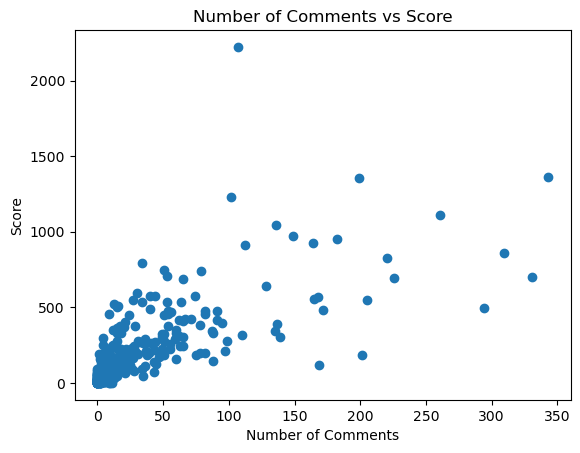

In [133]:
plt.scatter(clean_data['num_comments'], df['score'])
plt.xlabel('Number of Comments')
plt.ylabel('Score')
plt.title('Number of Comments vs Score')
plt.show()

#### Model training and testing by splitting data

80% of the data will be used for training the model, while 20% will be used for testing it.

In [136]:
from sklearn.model_selection import train_test_split
X = df[['num_comments']]
y = df['score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Linear Regression model fitting to train the dataset

In [138]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

##### Evaluating the performance of the trained linear regression model by calculating the Mean squared error and the R-squared score of the test data

The Mean squared error shown below shows that the prediction of the model is far from the actual value and thus needs improvement for accuracy

The R squared score below shows that about 42% of changes in the data which means more featured need to be captured by the model to imrpove accuracy.

In [143]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 10632.51547906102
R^2 Score: 0.6667076568142869


#### Plot showing regression line on data points

The scatterplot shows actual vs. predicted post scores, where the regression line - red shows the relationship between number of comments and scores

The plot shows a positive relationship between number of comments and the score of posts. An increase in the number of comments also gives an increase in the score. Some lines does not align closely to the red line, this shows that other factors may also affect the score of a post besides number of comment.

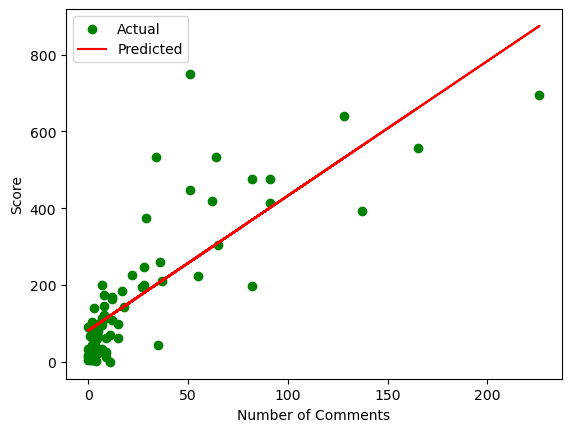

In [146]:
plt.scatter(X_test, y_test, color='green', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('Number of Comments')
plt.ylabel('Score')
plt.legend()
plt.show()

Answer 1b. Sentiment trend over time based on the latent topics in the post titles.

In [151]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

all_titles = clean_data['clean_title'].dropna().tolist() 

# Topic modeling
vectorizer = CountVectorizer(stop_words='english', max_features=5000)
title_vectors = vectorizer.fit_transform(all_titles)

lda_model = LatentDirichletAllocation(n_components=5, random_state=42)
lda_model.fit(title_vectors)

for idx, topic in enumerate(lda_model.components_):
    print(f"Topic {idx + 1}:")
    print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])

Topic 1:
['want', 'rise', 'state', 'trump', 'drug', 'jr', 'rfk', 'mcdonalds', 'outbreak', 'coli']
Topic 2:
['linked', 'life', 'say', 'drug', 'article', 'opinion', 'gift', 'doctor', 'health', 'study']
Topic 3:
['patient', 'people', 'scientist', 'abortion', 'jr', 'fda', 'rfk', 'study', 'cancer', 'new']
Topic 4:
['teen', 'covid', 'american', 'antibiotic', 'use', 'say', 'risk', 'ai', 'vaccine', 'health']
Topic 5:
['rfk', 'vaccine', 'case', 'human', 'kennedy', 'trump', 'jr', 'bird', 'flu', 'health']


In [155]:
from textblob import TextBlob
from sklearn.decomposition import LatentDirichletAllocation

vectorizer = CountVectorizer(stop_words='english')
title_vectors = vectorizer.fit_transform(clean_data['clean_title'])

lda_model = LatentDirichletAllocation(n_components=5, random_state=42)
lda_model.fit(title_vectors)

#Assign topics
topic_assignments = lda_model.transform(title_vectors).argmax(axis=1)
clean_data['topic'] = topic_assignments

#Calculation of sentiment
clean_data['sentiment'] = clean_data['clean_title'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Group sentiment 
topic_sentiment = clean_data.groupby('topic')['sentiment'].mean()
print(topic_sentiment)

topic
0    0.006901
1   -0.007084
2    0.045161
3    0.047011
4    0.084427
Name: sentiment, dtype: float64


The sentiment analysis below shows a change in emotional tones in the posts over time, with occasional spikes suggesting reactions to specific events or trending topics. 

Generally, the sentiment shifts between neutral, positive, and negative.

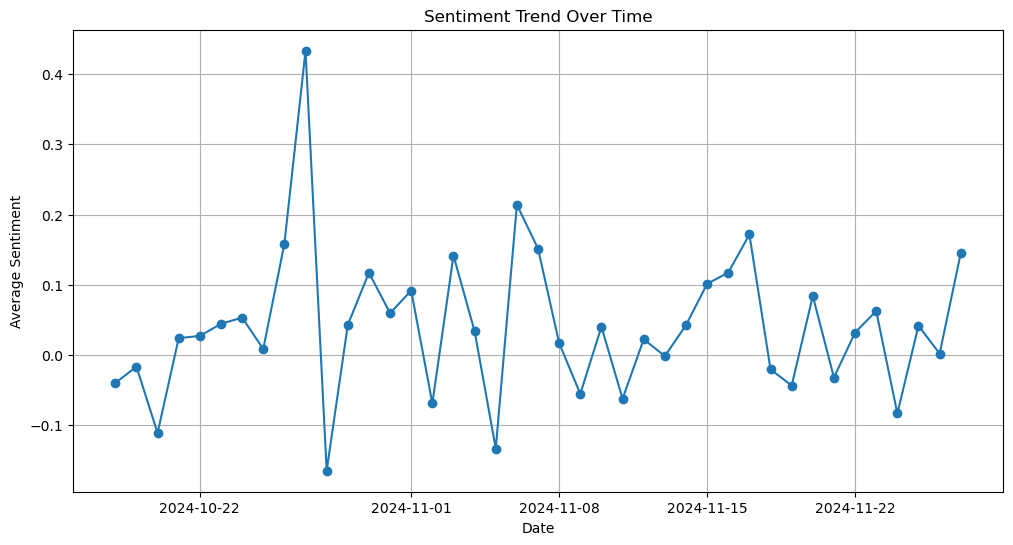

In [158]:
# Group by date
clean_data['date'] = pd.to_datetime(df['date'])
sentiment_trend = clean_data.groupby(clean_data['date'].dt.date)['sentiment'].mean()

# Plot sentiment
plt.figure(figsize=(12, 6))
plt.plot(sentiment_trend.index, sentiment_trend.values, marker='o')
plt.title('Sentiment Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Average Sentiment')
plt.grid(True)
plt.show()

Answer 1c: Relationship between score and num_comments using heatmap.

From the heatmap shown below a correlation of 0.73 shows that posts with higher score are likely too have more comments. This means popular posts may likely spark engagements. 

However, it does not necessarily mean that a higher score directly causes more connection, it just shows there is a strong relationship between the two.

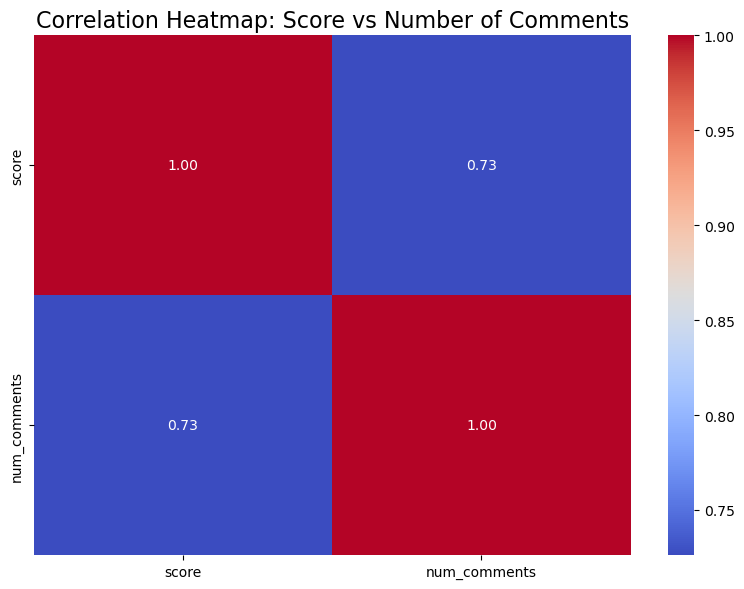

In [164]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = clean_data[['score', 'num_comments']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(
    correlation_matrix, 
    annot=True, 
    cmap='coolwarm', 
    fmt='.2f', 
    cbar=True
)
plt.title('Correlation Heatmap: Score vs Number of Comments', fontsize=16)
plt.tight_layout()
plt.show()

Answer 1c - Display title, num_comments and score

In [170]:
print(health_reddit[['title', 'num_comments', 'score']].head())


                                               title  num_comments  score
0  Billions of people suffer from anemia, but the...             2     24
1  Wildfire Smoke Linked to Increased Risk of Dem...             6     92
2  Reducing Abdominal Fat: Researchers Uncover Su...            28     76
3           Everyone Agrees Americans Aren’t Healthy            91    477
4  Vaping immediately affects vascular health and...            15     75


Answer 1d: Display the highest performing post title by score.

In [139]:
highest_performing_post = clean_data.sort_values(by='score', ascending=False).iloc[0]

print(f"Highest Performing Post Title: {highest_performing_post['clean_title']}")
print(f"Score: {highest_performing_post['score']}")

Highest Performing Post Title: vasectomy rise donald trump election win
Score: 2197


Answer 1e: Display highest performing post title by number of comments.

In [141]:
most_commented_post = clean_data.sort_values(by='num_comments', ascending=False).iloc[0]

print(f"Most Commented Post Title: {most_commented_post['clean_title']}")
print(f"Number of Comments: {most_commented_post['num_comments']}")


Most Commented Post Title: million risk losing health insurance trump victory
Number of Comments: 344


Answer 1f - What is the least performing post.

In [143]:
least_performing_post = clean_data.sort_values(by='score', ascending=True).iloc[0]

print(f"Least Performing Post Title: {least_performing_post['clean_title']}")
print(f"Score: {least_performing_post['score']}")


Least Performing Post Title: doctor warning diet drink especially woman
Score: 0


Answer 1g - List the least 5 performing posts.

In [150]:
least_5_posts = clean_data.sort_values(by='score', ascending=True).head(5)
print(least_5_posts[['clean_title', 'score']])

                                         clean_title_1  score
394         doctor warning diet drink especially woman      0
77   startling study link cannabis use genetic dama...      0
10    truth salt avoid one world biggest hidden killer      0
158                opinion wellness hobby gift article      0
364                 gastroenterologist thing every day      0


Answer 1f- Use a doughnut chart to identify represent the represent the top 10 performing title by score

C:\Users\Admin\AppData\Local\Temp\ipykernel_7112\3436040372.py:18: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


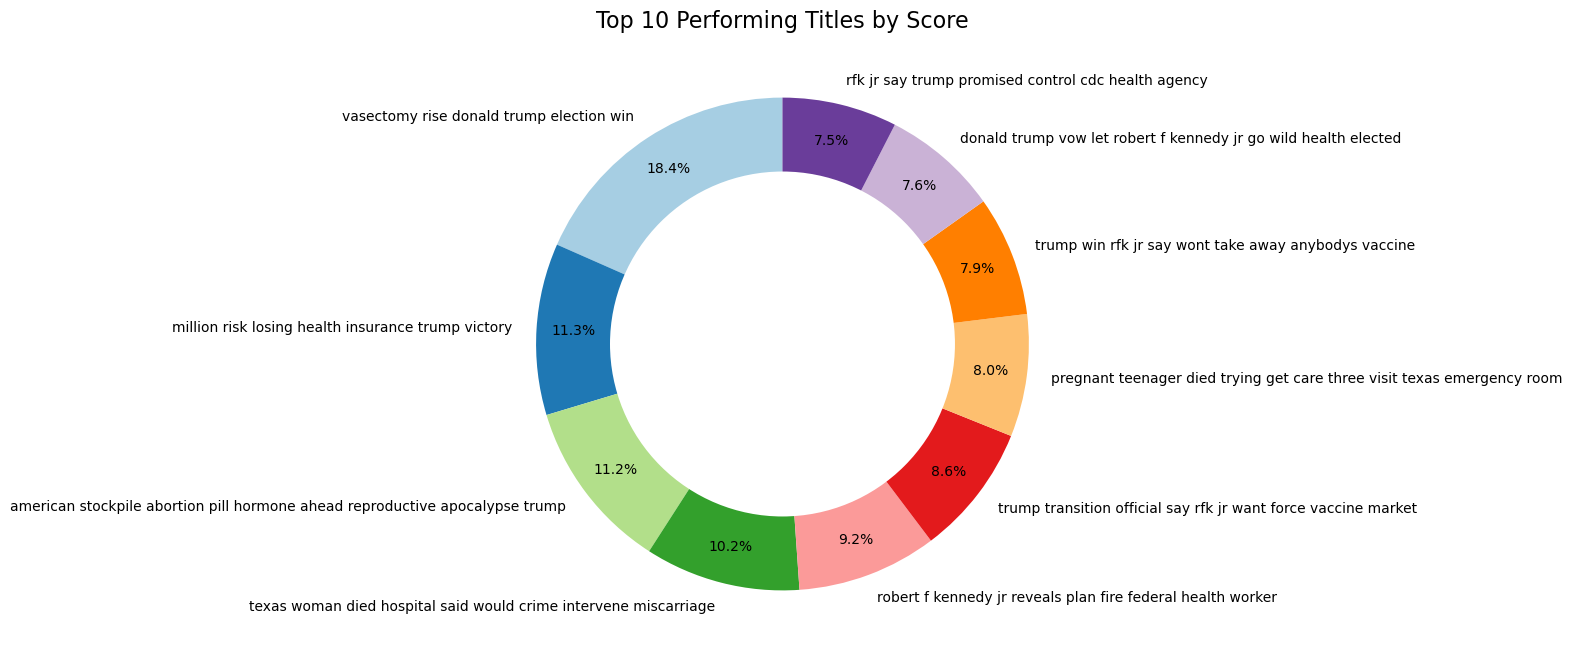

In [172]:
#Top 10
top_10_titles = clean_data.nlargest(10, 'score')

labels = top_10_titles['clean_title']
scores = top_10_titles['score']

# Create doughnut chart
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(
    scores, labels=labels, autopct='%1.1f%%', startangle=90,
    pctdistance=0.85, colors=plt.cm.Paired(range(len(labels)))
)

center_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(center_circle)

plt.title('Top 10 Performing Titles by Score', fontsize=16)
plt.tight_layout()
plt.show()

### Step 5: Summarise 

The reddit website is an easy and reliable platfrom to webscrape data with well detailed data sets.

#### Title(Post) performance
The analysis identifies the most dicussed topic as - "Millions at risk of losing health insurance after Trump's victory", which accumulated the highest score and comments. Other topics had varying frequency in comments and score suggesting that a high score does not always indicate that a topic will generate lots oF comments.

#### Author performance
The author with the highest number of posts did not produce the highest performing post. This suggests that even though frequent posting have a potential to increase engagement from a particular author, other factors like relevance and appeal of the post can increase engagements.

Authors like Nbcbews and wiredmagazine who ranked as the top authors with the highest number of post, also had 5th and 6th top performing titles. This suggests that even though frequent posting have a potential to increase engagement from a particular author, other factors like relevance and appeal of the post can increase engagements.

The highest performing post in this research is a function of posts with a high score and comments. This may have been because the title (topic) a health based post has some element of politics.


#### From the hypothesis testing and Regression
Using the linear regression prediction model, the result showed a positive relationship between post scores and number of comments but also highlighted that other factors may affect the number of score besides number of comments. The Mean squared error showed that the prediction of the model is far from the actual value and thus needs improvement for accuracy while the R squared score showed about 42% of changes in the data which means more features need to be captured by the model to imrpove accuracy.

#### From the sentiment analysis
The sentiment analysis highlights a change in emotional tones in the posts over time, with occasional increase suggesting reactions to specific events or trending topics. 

Generally, the sentiment shifts between neutral, positive, and negative.



### Conclusion

Posts with high scores tend to have more comments, thereby highlighting a strong relationship between title(topic) popularity and engagement. This does not mean that scores are the direct cause of having high comments. it is just a trend.

Future work may explore more on hypothesis testing and prediction modelling using polynomial regression, decision tree and boosting algorithms to improve prediction of engagemnents. There is also a need to show the impact of time of the day on engagement as well as comparison of engagement across other subreddits in the reddit website or other health websites.


Some dataset sources that are relevant to this topic can be found on:

Kaggle for health related post - https://www.kaggle.com/

Student doctor network - https://forums.studentdoctor.net/forums/

Heartforums.net - https://heart-failure.net/


